<html>
    <p style='background:#7B2B5D; color:#F79A23; font-size:20px; padding:10px;'><b>TP Smart Sensors : Apprentissage machine sur des données d’usinage
 </b></p>
</html>

<html>
    <p style='background:#FCDEB6; color:#7B2B5D; font-size:20px; padding:10px;'><b> Réalisé par : Mourad IZEM
        </b></p>
</html>

## PARTIE I
Dans cette partie, nous allons essayer de prédire l'erreur de perçage si on ajoute encore un certain nombre de trous en se basant sur les données dont on dispose ; l'erreur de perçage peut se définir comme étant l'écart entre le diamètre réel de perçage et le diamètre souhaité ; après la prédiction de l'erreur nous pouvons fixer lui associer un intervalle de tolérance et juger l'usure d'outil par la suite.


- Importation des bibliothèques 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

- Conversion en fichier CSV

In [2]:
# import data_capteurs
# data = data_capteurs.data
# df.to_csv('data_capteurs.csv') 

In [3]:
df=pd.read_csv('data_capteurs.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'P(x)', 'P(y)', 'D_In', 'D_In_max', 'D_In_min', 'D_Out',
       'D_Out_max', 'D_Out_min', 'D_Cyl', 'D_Cyl_max', 'D_Cyl_min',
       'Rz_In_max', 'Rz_In', 'Rz_Out_max', 'Rz_Out', 'Rz_Cyl_max', 'Rz_Cyl',
       'Rt_In', 'Rt_Out', 'Rt_Cyl', 'Rq_In', 'Rq_Out', 'Rq_Cyl', 'Ra_In',
       'Ra_Out', 'Ra_Cyl', 'Moy_F_T1&T2', 'Moy_F_T2&T3', 'Moy_F_T3&T4',
       'Max_F_T1&T2', 'Max_F_T2&T3', 'Max_F_T3&T4', 'Moy_M_T1&T2',
       'Moy_M_T2&T3', 'Moy_M_T3&T4', 'Max_M_T1&T2', 'Max_M_T2&T3',
       'Max_M_T3&T4', 'Et_Consommee'],
      dtype='object')

In [5]:
df= df.drop(['Unnamed: 0'],axis=1)
df

,P(x),P(y),D_In,D_In_max,D_In_min,D_Out,D_Out_max,D_Out_min,D_Cyl,D_Cyl_max,...,Max_F_T1&T2,Max_F_T2&T3,Max_F_T3&T4,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Max_M_T1&T2,Max_M_T2&T3,Max_M_T3&T4,Et_Consommee
0,0,0,6361.101,6390.165,6337.091,6356.137,6379.951,6331.168,6360.885,6386.484880,...,40.333260,60.192380,57.846468,0.039393,0.166414,0.224184,0.060992,0.265538,0.364416,203.421139
1,0,-14800,6360.422,6382.916,6336.803,6356.971,6385.830,6328.615,6361.655,6385.525948,...,46.471775,68.722535,63.219992,0.042361,0.233616,0.338397,0.055130,0.404222,0.509717,311.625602
2,0,-29600,6361.120,6380.387,6342.378,6355.782,6368.560,6346.285,6361.503,6384.172075,...,48.169981,74.660174,69.274525,0.044052,0.270518,0.380102,0.058972,0.471183,0.541733,346.459683
3,0,-44400,6361.548,6387.460,6335.587,6356.731,6374.355,6340.531,6362.440,6392.826233,...,49.695215,80.390653,69.841536,0.046448,0.307440,0.406943,0.065431,0.506979,0.561767,365.956399
4,0,-59200,6361.723,6388.822,6333.843,6357.077,6380.657,6335.277,6362.719,6391.846588,...,52.503333,86.261302,74.098430,0.048299,0.310324,0.421348,0.066481,0.517174,0.561583,385.516179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,118400,0,6355.081,6375.422,6335.066,6340.230,6372.068,6311.718,6356.408,6379.236240,...,130.304752,252.561854,202.032144,0.111991,0.517248,0.523941,0.196092,0.685887,0.689102,529.166337
165,118400,-14800,6357.184,6382.054,6331.823,6345.044,6365.299,6323.676,6357.638,6390.140820,...,126.627987,248.425308,192.645047,0.110182,0.512593,0.522755,0.196364,0.683191,0.686263,518.363776
166,118400,-29600,6358.094,6388.341,6328.915,6344.180,6361.655,6324.250,6358.210,6378.045799,...,131.047667,253.263482,204.158659,0.107396,0.502007,0.534826,0.194563,0.681927,0.690354,530.558941
167,118400,-44400,6357.664,6373.442,6340.405,6345.095,6375.165,6316.151,6358.392,6393.125875,...,133.153724,254.419605,200.067599,0.111047,0.518402,0.526384,0.198159,0.681588,0.684894,522.264747


- Corrélation entre les diamètres 

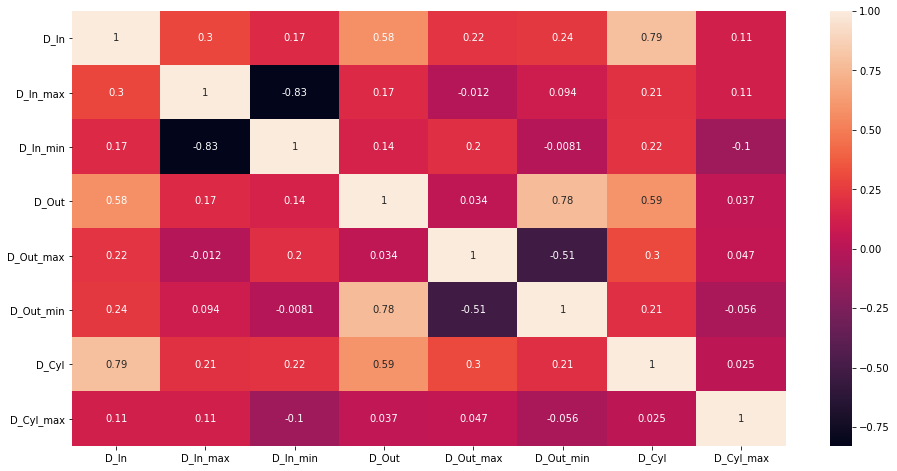

In [6]:
f = df[['D_In','D_In_max','D_In_min','D_Out','D_Out_max','D_Out_min','D_Cyl','D_Cyl_max']]
plt.figure(figsize=(16,8))
sns.heatmap(f.corr(),annot=True)
plt.show()

<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> - On constate qu'on a une corrélation considérable entre le D_In et D_Cyl et corrélation moins forte entre D_In et d_Out 
</html>

- Représenation des 3 diamètres par rapport à la cible 

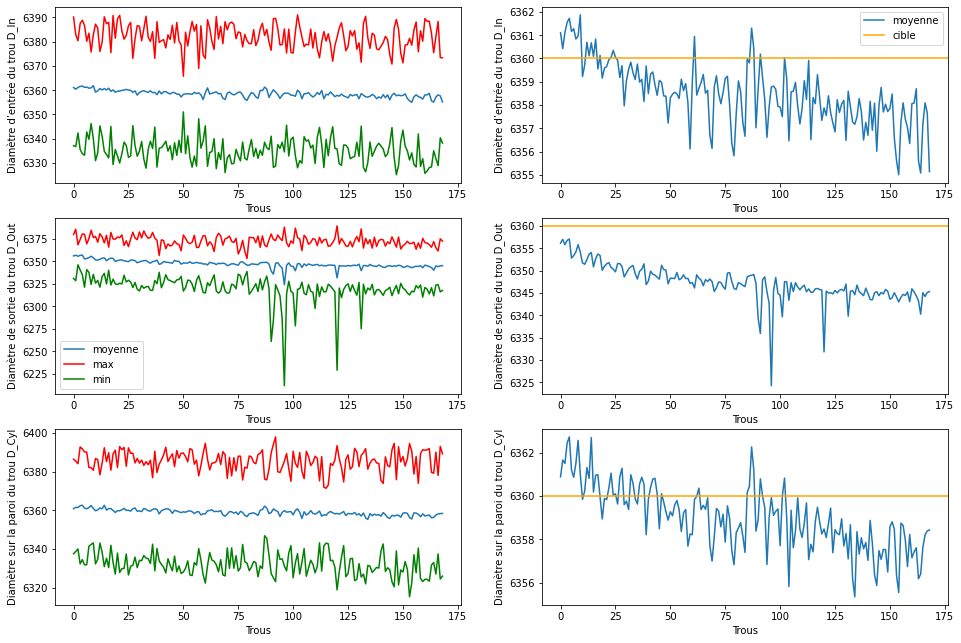

In [7]:
plt.figure(figsize=(16,11))
plt.subplot(3,2,1)
plt.plot(df['D_In'])
plt.xlabel("Trous")
plt.ylabel("Diamètre d’entrée du trou D_In")
plt.plot(df['D_In_max'],'r')
plt.plot(df['D_In_min'],'g')
plt.subplot(3,2,2)
plt.plot(df['D_In'])
plt.xlabel("Trous")
plt.ylabel("Diamètre d’entrée du trou D_In")
plt.axhline(y=  6360, color= 'orange')
plt.legend(['moyenne', 'cible'])
plt.subplot(3,2,3)
plt.plot(df['D_Out'])
plt.xlabel("Trous")
plt.ylabel("Diamètre de sortie du trou D_Out")
plt.plot(df['D_Out_max'],'r')
plt.plot(df['D_Out_min'],'g')
plt.legend(['moyenne', 'max','min'])
plt.subplot(3,2,4)
plt.plot(df['D_Out'])
plt.xlabel("Trous")
plt.ylabel("Diamètre de sortie du trou D_Out")
plt.axhline(y=  6360, color= 'orange')
plt.subplot(3,2,5)
plt.plot(df['D_Cyl'])
plt.xlabel("Trous")
plt.ylabel("Diamètre sur la paroi du trou D_Cyl")
plt.plot(df['D_Cyl_max'],'r')
plt.plot(df['D_Cyl_min'],'g')
plt.subplot(3,2,6)
plt.plot(df['D_Cyl'])
plt.xlabel("Trous")
plt.ylabel("Diamètre sur la paroi du trou D_Cyl")
plt.axhline(y=  6360, color= 'orange')

- Statistique descriptive des features

In [8]:
df.describe()

,P(x),P(y),D_In,D_In_max,D_In_min,D_Out,D_Out_max,D_Out_min,D_Cyl,D_Cyl_max,...,Max_F_T1&T2,Max_F_T2&T3,Max_F_T3&T4,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Max_M_T1&T2,Max_M_T2&T3,Max_M_T3&T4,Et_Consommee
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,59418.934911,-33146.745562,6358.506095,6382.018219,6335.288367,6347.271793,6372.816254,6320.166420,6359.020385,6385.629959,...,96.980734,186.113145,150.986479,0.091241,0.456573,0.507156,0.158073,0.641381,0.652299,495.611676
std,36355.036611,21363.314226,1.384732,5.138021,5.064020,4.068892,6.067197,15.416697,1.493826,5.318540,...,23.260321,47.725727,37.550656,0.018727,0.060787,0.042141,0.037306,0.056027,0.046062,48.073736
min,0.000000,-66600.000000,6355.008000,6365.769000,6325.184000,6324.194000,6353.384000,6211.709000,6355.362000,6371.502777,...,40.333260,60.192380,57.846468,0.039393,0.166414,0.224184,0.055130,0.265538,0.364416,203.421139
25%,29600.000000,-51800.000000,6357.702000,6378.637000,6331.831000,6345.219000,6368.841000,6316.677000,6358.090000,6382.435591,...,79.557485,152.285990,123.675574,0.080129,0.425741,0.490945,0.137519,0.618729,0.629909,479.153648
50%,59200.000000,-29600.000000,6358.479000,6382.166000,6335.044000,6347.071000,6372.970000,6321.359000,6358.972000,6386.131647,...,99.897251,195.319123,154.800162,0.100574,0.479764,0.513398,0.173551,0.657423,0.668949,506.162515
75%,88800.000000,-14800.000000,6359.306000,6386.153000,6338.604000,6349.433000,6376.483000,6326.730000,6359.982000,6389.641980,...,117.122615,226.627357,184.347021,0.106278,0.501980,0.533254,0.188777,0.678613,0.684894,528.312283
max,118400.000000,0.000000,6361.874000,6391.051000,6351.069000,6357.077000,6389.577000,6346.285000,6362.719000,6398.028948,...,140.659129,254.419605,210.883319,0.117752,0.534493,0.572200,0.210374,0.710003,0.718225,567.918000


<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> - On constate qu'en se basant sur l'écart type, que le diamètre de sortie D_Out présente  <b>une variabilité assez importante !!</b> Donc on ne va pas s'appuyer sur ce diamètre dans les opérations qui suivent
        </p>
</html>

<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> - Nous avons décidé de prendre le diamètre moyen d'entrée du trou D_in pour calculer l'erreur du perçage puisque ce dernier est corrélé fortement avec le D_Cyl
        </p>
</html>

- Distribution de D_In

<AxesSubplot:xlabel='D_In'>

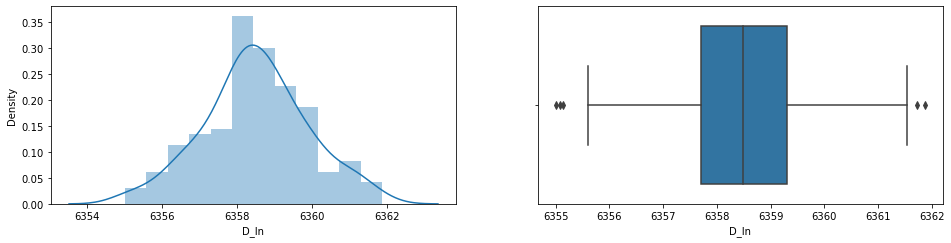

In [9]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['D_In'])
plt.subplot(2,2,2)
sns.boxplot(df['D_In'])

<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> - On constate qu'on a des valeurs abérrantes qui présentent les phases de rodage et vieillissement de l'outil <br> -  La distribution apparait normale
        </p>
</html>

- Elimination des valeurs abérrantes en utilisant la méthode d'interquartiles 

In [10]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 +1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "D_In")
print("Upper : ", upper)
print("Lower : ", lower)

df = df[(df['D_In'] > lower) & (df['D_In'] < upper)]

Upper :  6361.7119999999995
Lower :  6355.2959999999985


<AxesSubplot:xlabel='D_In'>

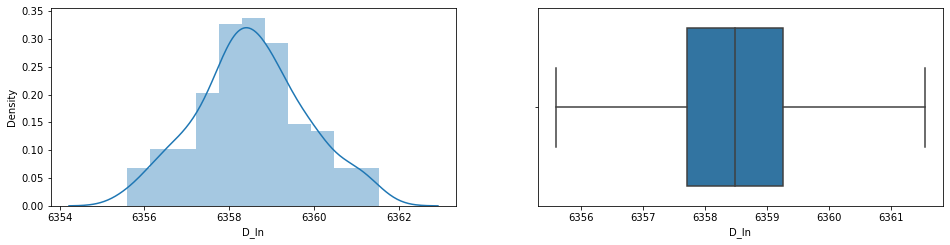

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['D_In'])
plt.subplot(2,2,2)
sns.boxplot(df['D_In'])

In [12]:
df['D_In'].isnull().sum()

0

<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> - Absence de valeurs manquantes !!
        </p>
</html>

- Calcul et distribution de l'erreur 

<AxesSubplot:xlabel='erreur', ylabel='Density'>

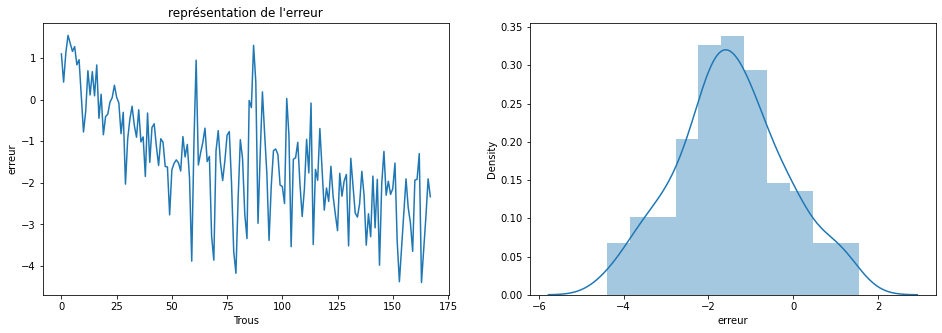

In [13]:
df['erreur'] = df['D_In']-6360
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(df['erreur'])
plt.title("représentation de l'erreur")
plt.xlabel('Trous')
plt.ylabel('erreur')
plt.subplot(1,2,2)
sns.distplot(df['erreur'])

In [14]:
df.shape 

(164, 40)

<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> - Distribution normale <br>- Suppression de 5 lignes après traitement !!
        </p>
</html>

- Ajouter un nouveau feature "nombre de trous réalisé"

In [15]:
lst=[]
for i in range(1,164+1):
    lst.append(i)
df['nb_trous']=lst

In [16]:
df

,P(x),P(y),D_In,D_In_max,D_In_min,D_Out,D_Out_max,D_Out_min,D_Cyl,D_Cyl_max,...,Max_F_T3&T4,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Max_M_T1&T2,Max_M_T2&T3,Max_M_T3&T4,Et_Consommee,erreur,nb_trous
0,0,0,6361.101,6390.165,6337.091,6356.137,6379.951,6331.168,6360.885,6386.484880,...,57.846468,0.039393,0.166414,0.224184,0.060992,0.265538,0.364416,203.421139,1.101,1
1,0,-14800,6360.422,6382.916,6336.803,6356.971,6385.830,6328.615,6361.655,6385.525948,...,63.219992,0.042361,0.233616,0.338397,0.055130,0.404222,0.509717,311.625602,0.422,2
2,0,-29600,6361.120,6380.387,6342.378,6355.782,6368.560,6346.285,6361.503,6384.172075,...,69.274525,0.044052,0.270518,0.380102,0.058972,0.471183,0.541733,346.459683,1.120,3
3,0,-44400,6361.548,6387.460,6335.587,6356.731,6374.355,6340.531,6362.440,6392.826233,...,69.841536,0.046448,0.307440,0.406943,0.065431,0.506979,0.561767,365.956399,1.548,4
5,7400,-7400,6361.162,6386.688,6333.230,6352.789,6380.182,6321.359,6361.187,6390.249536,...,78.146546,0.050122,0.318756,0.427641,0.070576,0.525139,0.565917,397.828862,1.162,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,111000,-51800,6358.702,6388.430,6328.112,6344.336,6368.665,6313.815,6357.620,6392.030404,...,198.967447,0.110002,0.506356,0.520680,0.189979,0.673155,0.677870,515.612055,-1.298,160
163,111000,-66600,6355.601,6383.340,6328.381,6343.201,6365.815,6320.822,6356.194,6379.702121,...,197.072782,0.110156,0.508846,0.517774,0.193966,0.674932,0.679268,514.459703,-4.399,161
165,118400,-14800,6357.184,6382.054,6331.823,6345.044,6365.299,6323.676,6357.638,6390.140820,...,192.645047,0.110182,0.512593,0.522755,0.196364,0.683191,0.686263,518.363776,-2.816,162
166,118400,-29600,6358.094,6388.341,6328.915,6344.180,6361.655,6324.250,6358.210,6378.045799,...,204.158659,0.107396,0.502007,0.534826,0.194563,0.681927,0.690354,530.558941,-1.906,163


In [17]:
y=df['erreur']
x=df[['nb_trous']]
#x.head()

- Phase d'appretissage avec 25% de données pour le test  

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
#x_train, x_test = x_train.values.reshape([-1, 1]), x_test.values.reshape([-1, 1])

## RandomForest Regressor 

In [20]:
model=RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', max_depth = 100, random_state = 40)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=1000,
                      random_state=40)

- Phase de test et evaluation du modèle

In [21]:
ERR_R = model.predict(x_test)

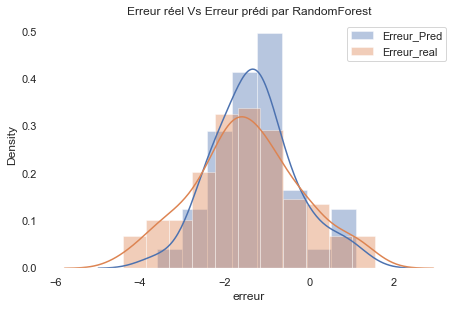

In [35]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Erreur réel Vs Erreur prédi par RandomForest')
sns.distplot(ERR_R, label='Erreur_Pred')
sns.distplot(df['erreur'],label='Erreur_real')
plt.legend()

- Evaluation par des scores 

In [23]:
from sklearn.metrics import mean_squared_error
print('R2_score_Training = ', model.score(x_train,y_train))
print('R2_score_Test = ',model.score(x_test,y_test))
print("MSE = ", mean_squared_error(y_test, ERR_R))

R2_score_Training =  0.9239153508395475
R2_score_Test =  0.3182914211713218
MSE =  1.3411913637915491


<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> Est ce qu'on peut espérer mieux que ça !! essayons en utilisant la validation croisée.
        </p>
</html>

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=7, n_repeats=1, random_state=1)
n_scores2 = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print("MSE_CV: ",abs(n_scores2.mean()))

MSE_CV:  0.866265211375824


<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> En utilisant la validation croisée, on a arrivé à minimiser l'MSE mais y a vraiment une grande différence !! Essayons avec d'aures modèles alors !
        </p>
</html>

## MLPRegressor 

- On va utiliser GridSearch pour identifier les meilleurs paramètres 

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
param_list = {"hidden_layer_sizes": [(1,),(50,),(100,),(200,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

mlp = MLPRegressor(max_iter = 500)
clf = GridSearchCV(mlp, param_list)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'} 0.5338952272685504


- Configuration du modèle avec les meilleurs params

In [26]:
model_mlp = MLPRegressor(hidden_layer_sizes =  (100,), activation = 'relu',alpha =  0.0005, solver= 'lbfgs',max_iter = 500)

- Phase d'apprentissage 

In [27]:
model_mlp.fit(x_train,y_train)

MLPRegressor(alpha=0.0005, max_iter=500, solver='lbfgs')

- Phase de test 

In [28]:
ERR_MLP = model_mlp.predict(x_test)

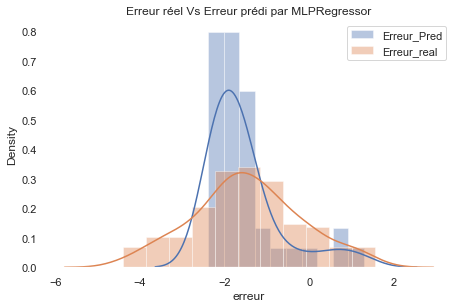

In [37]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Erreur réel Vs Erreur prédi par MLPRegressor')
sns.distplot(ERR_MLP, label='Erreur_Pred')
sns.distplot(df['erreur'],label='Erreur_real')
plt.legend()

- Evaluation du modèle en utilisant MSE - Mean Squared Error 

In [30]:
print("MSE: ", mean_squared_error(y_test, ERR_MLP))

MSE:  1.1562250932219937


- On constate que l'MSE a diminué de 0,99 jusqu'à 0,76 en utilisant MLPRegressor !! ce qui peut être aussi présenté par la courbe ci-dessous

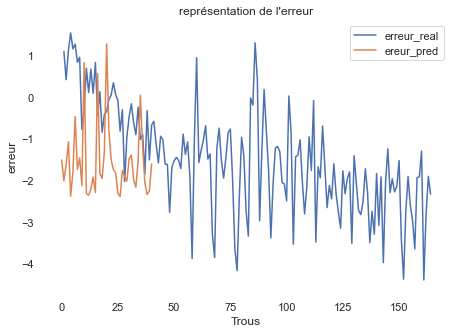

In [31]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(x,y)
plt.title("représentation de l'erreur")
plt.xlabel('Trous')
plt.ylabel('erreur')
plt.plot(ERR_MLP)
plt.legend(['erreur_real', 'ereur_pred'])
